In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import re
from datetime import timedelta


In [ ]:

def bepaal_lineair_verband(x, y):
    """
    Voert een lineaire regressie uit op de gegeven gegevens en toont de resultaten.
    
    Parameters:
    x (list of np.array): Onafhankelijke variabele
    y (list of np.array): Afhankelijke variabele
    """
    
    # Uitvoeren van lineaire regressie
    regressie_resultaat = linregress(x, y)
    
    # Haal de resultaten op
    helling = regressie_resultaat.slope
    intercept = regressie_resultaat.intercept
    r_waarde = regressie_resultaat.rvalue
    p_waarde = regressie_resultaat.pvalue
    standaard_fout = regressie_resultaat.stderr
    
    # Weergeven van de resultaten
    print(f"Helling: {helling}")
    print(f"Intercept: {intercept}")
    print(f"R-kwadraat: {r_waarde**2}")
    print(f"P-waarde: {p_waarde}")
    print(f"Standaardfout: {standaard_fout}")
    
    # Plot de data en de regressielijn
    plt.scatter(x, y, label="Data punten")
    plt.plot(x, helling * np.array(x) + intercept, color='red', label=f"Regressielijn (y={helling:.2f}x+{intercept:.2f})")
    plt.xlabel("Onafhankelijke variabele (x)")
    plt.ylabel("Afhankelijke variabele (y)")
    plt.legend()
    plt.title("Lineaire regressie")
    plt.grid()
    plt.show()


# Functie om afstand/tijd correct om te zetten
def convert_value(value):
    value = str(value).strip()  # Zorg dat het een string is en geen spaties bevat
    
    # 1. Controleer of het een afstand is (bijv. '0.55 m')
    if "m" in value and ":" not in value:
        return float(value.replace("m", "").strip())  # Zet om naar float
    
    # 2. Controleer of het een tijd in seconden is (bijv. '14.68 s')
    if "s" in value:
        return float(timedelta(seconds=float(value.replace("s", "").strip())).total_seconds())  # Zet om naar timedelta
    
    # 3. Controleer of het een tijd in het formaat '1h:03:29.63' is
    if "h:" in value:
        hours, rest = value.split("h:")
        minutes, seconds = rest.split(":")
        return float(timedelta(hours=int(hours), minutes=int(minutes), seconds=float(seconds)).total_seconds())
    
    # 4. Controleer of het een tijd in het formaat '1:02.18' is (minuten:seconden)
    if re.match(r"^\d+:\d+\.\d+$", value):
        minutes, seconds = value.split(":")
        return float(timedelta(minutes=int(minutes), seconds=float(seconds)).total_seconds())
    
    return None  # Onbekend formaat


In [11]:
df = pd.read_csv("data/database.csv")

# Pas de conversie resultaten toe
df["Resultaat geconverteerd"] = df["Resultaat"].apply(convert_value)

df.head()

,Favoriete onderdeel,Naam,AtleetID,Leeftijd,Land,Geslacht,MaxID,Specialiteit,Humeur,Ervaring,...,Lenigheid,Springen,Werpen,SP1,SP2,Discipline,Resultaat,Punten Resultaat,Week,Resultaat geconverteerd
0,Onbekend,Abad Olimpia,5653064,16,España,Vrouw,760,Springers,16,1,...,3,6,2,7,6,Hoogspringen,0.55 m,0,7,0.55
1,Onbekend,Abad Olimpia,5653064,16,España,Vrouw,760,Springers,16,1,...,3,6,2,7,6,Polsstokhoogspringen,1.38 m,0,7,1.38
2,Onbekend,Abad Olimpia,5653064,16,España,Vrouw,760,Springers,16,1,...,3,6,2,7,6,Verspringen,2.51 m,90,7,2.51
3,Onbekend,Abad Olimpia,5653064,16,España,Vrouw,760,Springers,16,1,...,3,6,2,7,6,Hinkstapspringen,4.01 m,0,7,4.01
4,Onbekend,Agoni Livia,5567612,26,Italia,Vrouw,2690,Springers,20,2,...,3,11,1,10,8,Hoogspringen,0.88 m,182,7,0.88


Helling: -94.47095928412602
Intercept: 3268.0733221813243
R-kwadraat: 0.9999940384701734
P-waarde: 0.0
Standaardfout: 0.01643407888715108


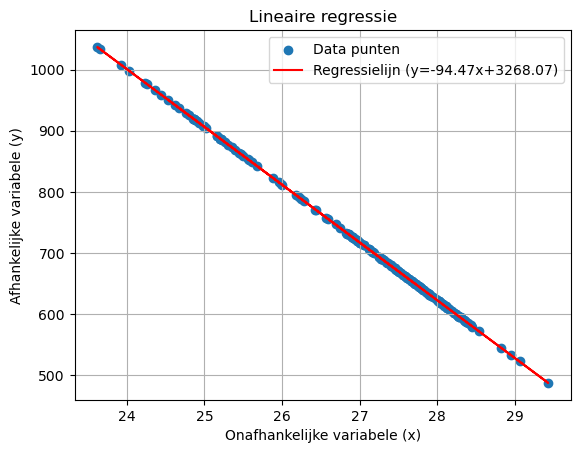

In [29]:
df_100m_man = df[(df["Discipline"] == "200 meter") & (df["Geslacht"] == "Man") & (df["Punten Resultaat"] > 0)]

x = df_100m_man["Resultaat geconverteerd"].to_list()
y = df_100m_man["Punten Resultaat"].to_list()


bepaal_lineair_verband(x, y)

Helling: -89.68970829053718
Intercept: 3268.431373420489
R-kwadraat: 0.9999960517258747
P-waarde: 0.0
Standaardfout: 0.012997750408617226


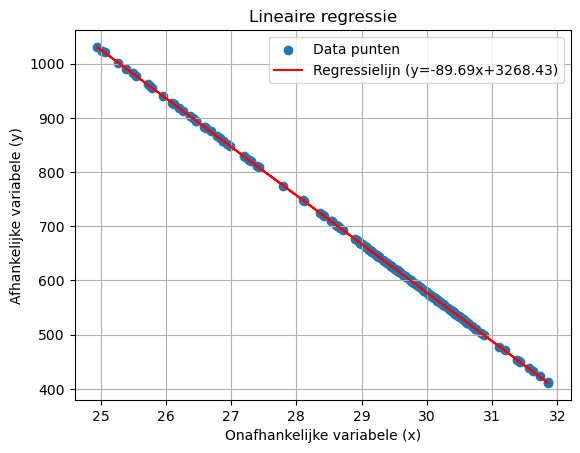

In [30]:
df_100m_man = df[(df["Discipline"] == "200 meter") & (df["Geslacht"] == "Vrouw") & (df["Punten Resultaat"] > 0)]

x = df_100m_man["Resultaat geconverteerd"].to_list()
y = df_100m_man["Punten Resultaat"].to_list()


bepaal_lineair_verband(x, y)